In [1]:
import numpy as np
import matplotlib.pyplot as plt
from flow_decomposer import FlowDecomposition

In [7]:


#############################################
# New test example using mixed Lorenz systems #
#############################################

def simulate_lorenz(initial, sigma=10, rho=28, beta=8/3, dt=0.01, steps=1000):
    """
    Simulate a Lorenz attractor using Euler integration.
    Returns an array of shape (steps, 3).
    """
    trajectory = np.empty((steps, 3))
    trajectory[0] = initial
    for i in range(1, steps):
        x, y, z = trajectory[i-1]
        dx = sigma * (y - x)
        dy = x * (rho - z) - y
        dz = x * y - beta * z
        trajectory[i] = trajectory[i-1] + dt * np.array([dx, dy, dz])
    return trajectory

steps = 10000

# Simulate three independent Lorenz attractors.
traj1 = simulate_lorenz(initial=[1.0, 1.0, 1.0], steps=steps)
traj2 = simulate_lorenz(initial=[0.1, -1.0, 1.0], steps=steps)
traj3 = simulate_lorenz(initial=[0.5, 0.5, 0.0], steps=steps)

# Stack the three trajectories horizontally.
# This yields a latent data matrix of shape (steps, 9) [3 systems x 3 dimensions each].
X_latent = np.hstack([traj1, traj2, traj3])

M = np.random.randn(X_latent.shape[1], 20)  

# Mix the latent signals to generate the observed data.
X_mixed = X_latent @ M  # shape (steps, observed_dim)
X_mixed = (X_mixed - X_mixed.mean(axis=0))/X_mixed.std(axis=0)
# Initialization parameters for FlowDecomposition.
init_params = {
    "input_dim": 20, 
    "proj_dim": 3,
    "n_components": 3,        
    "num_delays": 0,
    "delay_step": 0,
    "subtract_autocorr": False,
    "device": "cuda",
    "optimizer": "Adagrad",
    "learning_rate": 0.1,
    "random_state": None
}

# Fit parameters.
fit_params = {
    "sample_size": 100,
    "library_size": 600,
    "exclusion_rad": 20,
    "time_intv": 100,
    "num_epochs": 500,
    "num_rand_samples": 32,
    "batch_size": 32,
    "method": "knn",
    "nbrs_num": 12,
    "theta":5,
    "beta": 0,
    "optim_policy": "range",
    "mask_size": None
}

fd = FlowDecomposition(**init_params)
fd.fit(X_mixed, **fit_params)

Epoch 1/500, Loss: 0.9520, ccm_loss: 0.9520, h_norm_loss: 0.8704
Epoch 2/500, Loss: 0.8923, ccm_loss: 0.8923, h_norm_loss: 0.8109
Epoch 3/500, Loss: 0.8708, ccm_loss: 0.8708, h_norm_loss: 0.8241
Epoch 4/500, Loss: 0.7883, ccm_loss: 0.7883, h_norm_loss: 0.8284
Epoch 5/500, Loss: 0.6619, ccm_loss: 0.6619, h_norm_loss: 0.7999
Epoch 6/500, Loss: 0.6432, ccm_loss: 0.6432, h_norm_loss: 0.8212
Epoch 7/500, Loss: 0.5590, ccm_loss: 0.5590, h_norm_loss: 0.8200
Epoch 8/500, Loss: 0.5307, ccm_loss: 0.5307, h_norm_loss: 0.8204
Epoch 9/500, Loss: 0.5694, ccm_loss: 0.5694, h_norm_loss: 0.8179
Epoch 10/500, Loss: 0.4278, ccm_loss: 0.4278, h_norm_loss: 0.8134
Epoch 11/500, Loss: 0.4888, ccm_loss: 0.4888, h_norm_loss: 0.7969
Epoch 12/500, Loss: 0.3967, ccm_loss: 0.3967, h_norm_loss: 0.8033
Epoch 13/500, Loss: 0.4829, ccm_loss: 0.4829, h_norm_loss: 0.7984
Epoch 14/500, Loss: 0.4415, ccm_loss: 0.4415, h_norm_loss: 0.8016
Epoch 15/500, Loss: 0.3977, ccm_loss: 0.3977, h_norm_loss: 0.8089
Epoch 16/500, Loss:

In [9]:
unmixed = fd.predict(X_mixed)

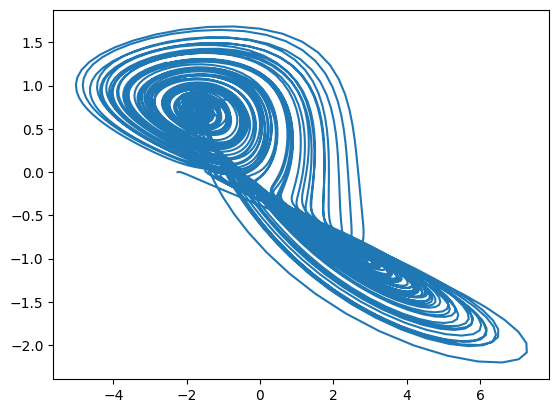

In [10]:
plt.plot(unmixed[:,2,0],unmixed[:,2,2])

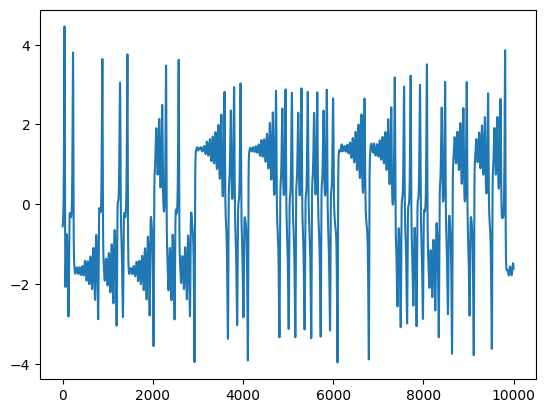

In [11]:
plt.plot(unmixed[:,0,0])